In [1]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [2]:
df_results = pd.read_csv("error_df.csv")

In [3]:
df_results.head()

,S.No,True_class,Predicted_Class,Predicted_Probability
0,1,1,1,0.82
1,2,1,0,0.34
2,3,0,1,0.70
3,4,1,0,0.25
4,5,1,0,0.35


In [6]:
LABELS=['Fraud','Non_Fraud']

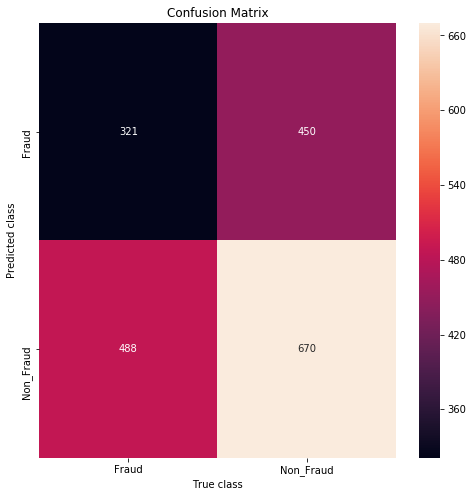

In [8]:
conf_matrix= confusion_matrix(df_results.True_class, df_results.Predicted_Class)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix,xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted class")
plt.xlabel("True class")
plt.show()

In [37]:
pred_y1 = [1 if e >= 0.6 else 0 for e in df_results.Predicted_Probability]

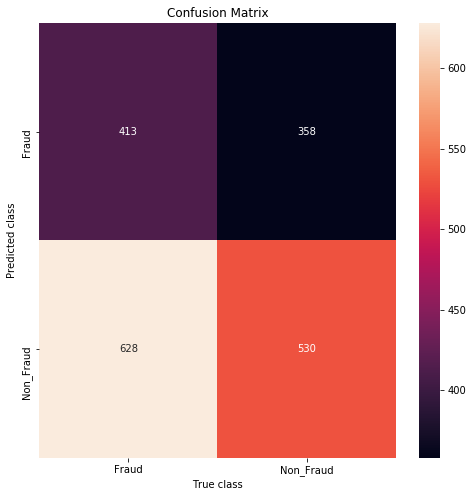

In [38]:
conf_matrix1= confusion_matrix(df_results.True_class, pred_y1)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix1,xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted class")
plt.xlabel("True class")
plt.show()

In [40]:
false_pos_rate, true_pos_rate, threshold = roc_curve(df_results.True_class, df_results.Predicted_Class)

In [27]:
len(threshold)

56

In [41]:
roc_df = pd.DataFrame({'FPR':false_pos_rate, 'TPR':true_pos_rate,'Threshold':threshold})
roc_df.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,2
1,0.583658,0.578584,1
2,1.000000,1.000000,0


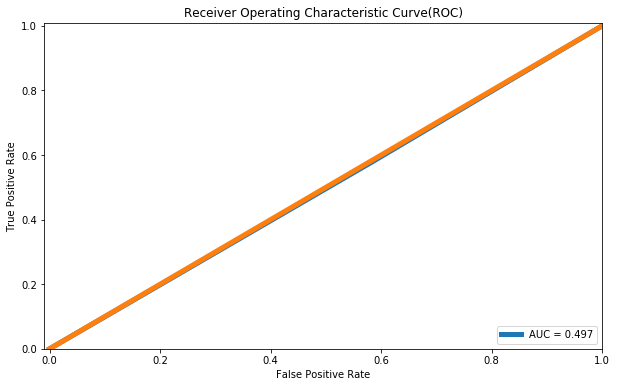

In [42]:
roc_auc = auc(false_pos_rate, true_pos_rate)
plt.figure(figsize=(10,6))
plt.plot(false_pos_rate, true_pos_rate, linewidth=5,label= 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],linewidth=5)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve(ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
